实验报告

提取基本信息和三年的每股收益（以11家公司为例）

In [1]:
import pdfplumber
import pandas as pd
import os

In [2]:
def pdf2txt(pdf_file):
    text = ''
    with pdfplumber.open(pdf_file) as pdf:
        for page in pdf.pages:
            text_in_page = page.extract_text()
            if text_in_page != None:
                text = text + text_in_page
    txt_file = pdf_file[0:-4]+'.txt'
    f_txt = open(txt_file, 'w', encoding='utf-8')
    f_txt.write(text)
    f_txt.close()
    return()

def txt2ram(txt_file):
    f = open(txt_file, 'r', encoding='utf-8')
    text = f.read()
    f.close()
    return(text)

In [3]:
path = "C:\\Users\\ASUS123\\Desktop\\大三上学期课程合辑\\金融数据获取与分析\\实验报告"
sypdf = os.listdir( path ) # sy:suoyou 所有
for item in sypdf:
    path = 'C:\\Users\\ASUS123\\Desktop\\大三上学期课程合辑\\金融数据获取与分析\\实验报告\\'+item
    print(item)
    pdf2txt(path)
path = "C:\\Users\\ASUS123\\Desktop\\大三上学期课程合辑\\金融数据获取与分析\\实验报告"
sypdf = os.listdir( path )    
pdf_files = []

300081：2019年年度报告.pdf
300161：2019年年度报告.pdf
300174：2019年年度报告.pdf
300214：2019年年度报告.pdf
300235：2019年年度报告.pdf
300291：2019年年度报告.pdf
300316：2019年年度报告.pdf
300363：2019年年度报告.pdf
300370：2019年年度报告.pdf
300428：2019年年度报告.pdf
300442：2019年年度报告.pdf


In [4]:
for f in sypdf:
    if f[-4:] == '.pdf':
        pdf_files.append(f)
txt_files = []
for f in sypdf:
    if f[-4:] == '.txt':        
        txt_files.append(f)
stata1=[]
stata2=[]
stata3=[]
stata4=[]
stata5=[]
stata6=[]  
stata7=[]
stata8=[]
stata9=[]        
for item in txt_files:
    path = 'C:\\Users\\ASUS123\\Desktop\\大三上学期课程合辑\\金融数据获取与分析\\实验报告\\'+item
    f = open(path, 'r', encoding='utf-8')
    text = f.read()
    #print(path)
    start_index = text.find('一、公司信息')
    end_index = text.find('二、联系人和联系方式')
    start_index2 = text.find('五、主要会计数据和财务指标')
    end_index2 = text.find('六、分季度主要财务指标')     
    kjsj_cwzb = text[start_index:end_index] 
    desj_cwzb = text[start_index2:end_index2]
    #print(kjsj_cwzb)
    gpjc= kjsj_cwzb.find('股票简称')
    gsmc = kjsj_cwzb.find('公司的中文名称')
    gsdb = kjsj_cwzb.find('公司的法定代表人')
    zcdz = kjsj_cwzb.find('注册地址')
    bgdz = kjsj_cwzb.find('办公地址')
    yzbm = kjsj_cwzb.find('办公地址的邮政编码')
    wz = kjsj_cwzb.find('公司国际互联网网址')
    lxfs = kjsj_cwzb.find('二、联系人和联系方式')
    sy = desj_cwzb.find('基本每股收益（元/股）') 
    xssy = desj_cwzb.find('稀释每股收益（元/股）') 
    yysr = kjsj_cwzb[gpjc:gsmc]+kjsj_cwzb[gsdb:zcdz]+kjsj_cwzb[bgdz:yzbm]+kjsj_cwzb[wz:lxfs]
    yysr2 = desj_cwzb[sy:xssy]
    yysr1=yysr+yysr2
    #print(yysr)
    words = yysr1.split(' ')
    #print(words)
    words = [i for i in words if i != '']
        #print(words)
    stata1.append(words[1])
    stata2.append(words[3])
    stata3.append(words[5])
    stata4.append(words[7])
    stata5.append(words[9])
    stata6.append(words[11])    
    stata7.append(words[13])
    stata8.append(words[14])
    stata9.append(words[16])
    
finalresult= pd.DataFrame({'股票简称':stata1,
                 '股票代码':stata2,
                 '公司的法定代表人':stata3,
                 '办公地址':stata4,
                 '公司国际互联网网址':stata5,
                 '公司邮箱':stata6,
                 '2019年':stata7,
                 '2018年':stata8,
                 '2017年':stata9})

In [5]:
print('finalresult：')
display(finalresult)


finalresult：


股票简称    股票代码 公司的法定代表人                                      办公地址  \
0   恒信东方  300081      孟宪民                     北京市海淀区蓝靛厂南路牛顿办公区北区11层   
1   华中数控  300161      陈吉红                             武汉市东湖开发区华工科技园   
2   元力股份  300174      许文显                           福建省南平市陈坑至瓦口工业园区   
3   日科化学  300214      彭国锋                            山东省昌乐县英轩街3999号   
4   方直科技  300235      黄元忠                     深圳市南山区大新路198号创新大厦B座9楼   
5   华录百纳  300291       方刚                         北京市朝阳区安家楼50号院A7-2   
6   晶盛机电  300316      曹建伟                      浙江省杭州市余杭区五常街道创智一号2号楼   
7   博腾股份  300363      居年丰  重庆市北碚区水土园区方正大道重庆博腾制药科技股份有限公司新药外包服务基地研发中心   
8   安控科技  300370      许永良                           北京市海淀区地锦路9号院6号楼   
9   四通新材  300428      臧立国                            保定市清苑区发展西街359号   
10   普丽盛  300442      姜卫东                          上海市金山区张堰镇金张支路84号   

                  公司国际互联网网址                         公司邮箱   2019年    2018年  \
0     http://www.hxgro.com/             office@hxgro.com  0.1068   0.3739   
1       www.huazhongcnc.com               hcnc@hzncc.com  0.0887   0.0966   
2      www.yuanlicarbon.com          dm@yuanlicarbon.com  0.2187   0.3376   
3   http://www.rikechem.com        rikechem@rikechem.com    0.42     0.24   
4        www.kingsunedu.com  kingsunsoft@kingsunsoft.com    0.19     0.07   
5       http://www.hlbn.cc/               hbndsh@hlbn.cc  0.1401  -4.2063   
6       http://www.jsjd.cc/                 jsjd@jsjd.cc    0.50     0.46   
7      http://www.porton.cn          porton.db@porton.cn    0.35     0.26   
8             www.etrol.com               info@etrol.com  0.0136  -0.5748   
9    http://www.stnm.com.cn             info@stnm.com.cn    0.77     0.75   
10           www.cn-pls.com               pls@cn-pls.com    0.13    -2.41   

     2017年  
0   0.1889  
1   0.1902  
2   0.1988  
3     0.23  
4     0.05  
5   0.1356  
6     0.30  
7     0.25  
8   0.1108  
9     0.78  
10    0.09

In [6]:
import matplotlib.pyplot as plt

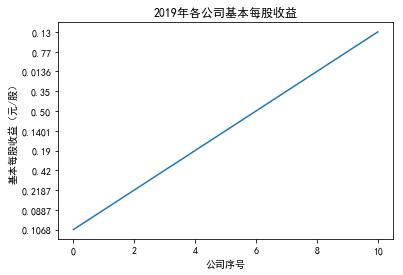

In [13]:
plt.rcParams['font.sans-serif']=['SimHei']
finalresult['2019年']           
plt.plot(finalresult['2019年'])
plt.xlabel('公司序号')
plt.ylabel('基本每股收益（元/股）')
plt.title('2019年各公司基本每股收益')
plt.show()

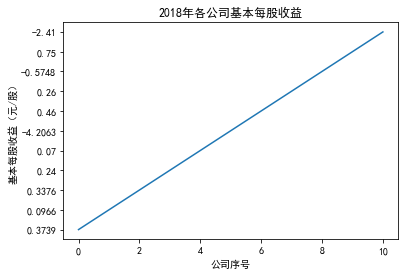

In [14]:
plt.rcParams['font.sans-serif']=['SimHei']
finalresult['2018年']           
plt.plot(finalresult['2018年'])
plt.xlabel('公司序号')
plt.ylabel('基本每股收益（元/股）')
plt.title('2018年各公司基本每股收益')
plt.show()

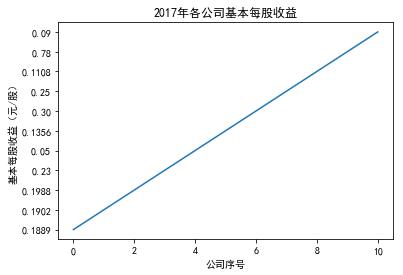

In [15]:
plt.rcParams['font.sans-serif']=['SimHei']
finalresult['2017年']           
plt.plot(finalresult['2017年'])
plt.xlabel('公司序号')
plt.ylabel('基本每股收益（元/股）')
plt.title('2017年各公司基本每股收益')
plt.show()

2.文字分析规律

通过画出了三年的各公司的基本每股收益我们可以发现：
1.绝大多数公司三年的基本每股收益大都是正的还是处于比较良好的经营状态。
2.机电，建材等类型的公司生产经营活动的波动是比较大的，比如晶盛机电，四通新材，普丽盛等公司波动就比较大